In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/Project_BCA/Dataset/facebook_sentiment.csv', encoding=DATASET_ENCODING)
df.head()

FBComments  Label
0  Drug Runners and  a U.S. Senator have somethin...      0
1  Heres a single, to add, to Kindle. Just read t...      0
2  If you tire of Non-Fiction.. Check out http://...      0
3    Ghost of Round Island is supposedly nonfiction.      0
4  Why is Barnes and Nobles version of the Kindle...     -1

In [4]:
df.columns

Index(['FBComments', 'Label'], dtype='object')

In [5]:
df. shape

(1000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FBComments  1000 non-null   object
 1   Label       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
np.sum(df.isnull().any(axis=1))

0

In [8]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   2
Count of rows in the data is:   1000


In [9]:
df['Label'].unique()

array([ 0, -1,  1])

In [10]:
df['Label'].nunique()

3

<Axes: xlabel='Label', ylabel='count'>

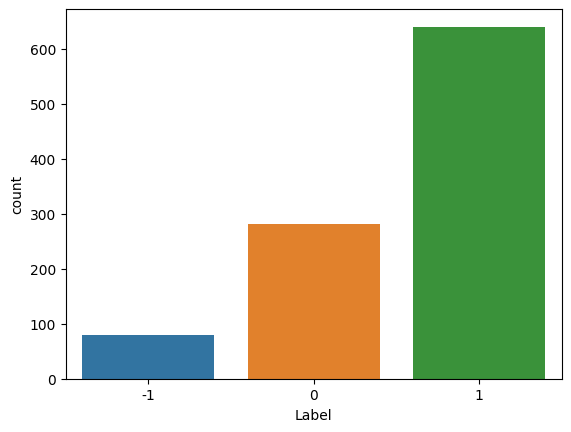

In [11]:
import seaborn as sns
sns.countplot(x='Label', data=df)

In [12]:
data=df[['FBComments','Label']]

data_pos = data[data['Label'] == 1]
data_neu = data[data['Label'] == 0]
data_neg = data[data['Label'] == -1]

data_pos = data_pos.iloc[:int(300)]
data_neu = data_neg.iloc[:int(300)]
data_neg = data_neg.iloc[:int(300)]

dataset = pd.concat([data_pos, data_neg, data_neu])

In [13]:
dataset['FBComments']=dataset['FBComments'].str.lower()
dataset['FBComments'].tail()

950    i love my kindle, though the publishing indust...
976    mmm no esto no es un ipad, es un libro; no tam...
981    throw it my purse and go. have my whole librar...
992    i was reading with it for around 8 hours yeste...
998    develop a way to share books!  that is a big d...
Name: FBComments, dtype: object

In [14]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [15]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(FBComments):
    return " ".join([word for word in str(FBComments).split() if word not in STOPWORDS])
dataset['FBComments'] = dataset['FBComments'].apply(lambda FBComments: cleaning_stopwords(FBComments))
dataset['FBComments'].head()

5     @maria: mean nook? careful, books buy kindle p...
6                           kindle awesome! mines great
7                                         love mine!!!!
9                                 daugjhter loves hers!
11    got kindle xmas love it. never much book reade...
Name: FBComments, dtype: object

In [16]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['FBComments'] = dataset['FBComments'].apply(lambda x: cleaning_numbers(x))
dataset['FBComments'].tail()

950    love kindle, though publishing industry seems ...
976    mmm no esto no es un ipad, es un libro; no tam...
981    throw purse go. whole library,some games, docs...
992    reading around  hours yesterday battery hardly...
998    develop way share books! big drawback. love ki...
Name: FBComments, dtype: object

In [17]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['FBComments'] = dataset['FBComments'].apply(lambda x: cleaning_URLs(x))
dataset['FBComments'].tail()

950    love kindle, though publishing industry seems ...
976    mmm no esto no es un ipad, es un libro; no tam...
981    throw purse go. whole library,some games, docs...
992    reading around  hours yesterday battery hardly...
998    develop way share books! big drawback. love ki...
Name: FBComments, dtype: object

In [18]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['FBComments'] = dataset['FBComments'].apply(lambda x: cleaning_repeating_char(x))
dataset['FBComments'].tail()

950    love kindle, though publishing industry seems ...
976    mmm no esto no es un ipad, es un libro; no tam...
981    throw purse go. whole library,some games, docs...
992    reading around  hours yesterday battery hardly...
998    develop way share books! big drawback. love ki...
Name: FBComments, dtype: object

In [19]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(FBComments):
    translator = str.maketrans('', '', punctuations_list)
    return FBComments.translate(translator)
dataset['FBComments']= dataset['FBComments'].apply(lambda x: cleaning_punctuations(x))
dataset['FBComments'].tail()

950    love kindle though publishing industry seems d...
976    mmm no esto no es un ipad es un libro no tampo...
981    throw purse go whole librarysome games docs ba...
992    reading around  hours yesterday battery hardly...
998    develop way share books big drawback love kind...
Name: FBComments, dtype: object

In [20]:
import nltk
nltk.download('all')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [21]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['FBComments'] = dataset['FBComments'].apply(tokenizer.tokenize)
dataset['FBComments'].head()

5     [w, w]
6        [w]
7         []
9         []
11        []
Name: FBComments, dtype: object

In [22]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    FBComments = [st.stem(word) for word in data]
    return data
dataset['FBComments']= dataset['FBComments'].apply(lambda x: stemming_on_text(x))
dataset['FBComments'].head()

5     [w, w]
6        [w]
7         []
9         []
11        []
Name: FBComments, dtype: object

In [23]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    FBComments = [lm.lemmatize(word) for word in data]
    return data
dataset['FBComments'] = dataset['FBComments'].apply(lambda x: lemmatizer_on_text(x))
dataset['FBComments'].head()

5     [w, w]
6        [w]
7         []
9         []
11        []
Name: FBComments, dtype: object

In [24]:
X=data.FBComments
y=data.Label

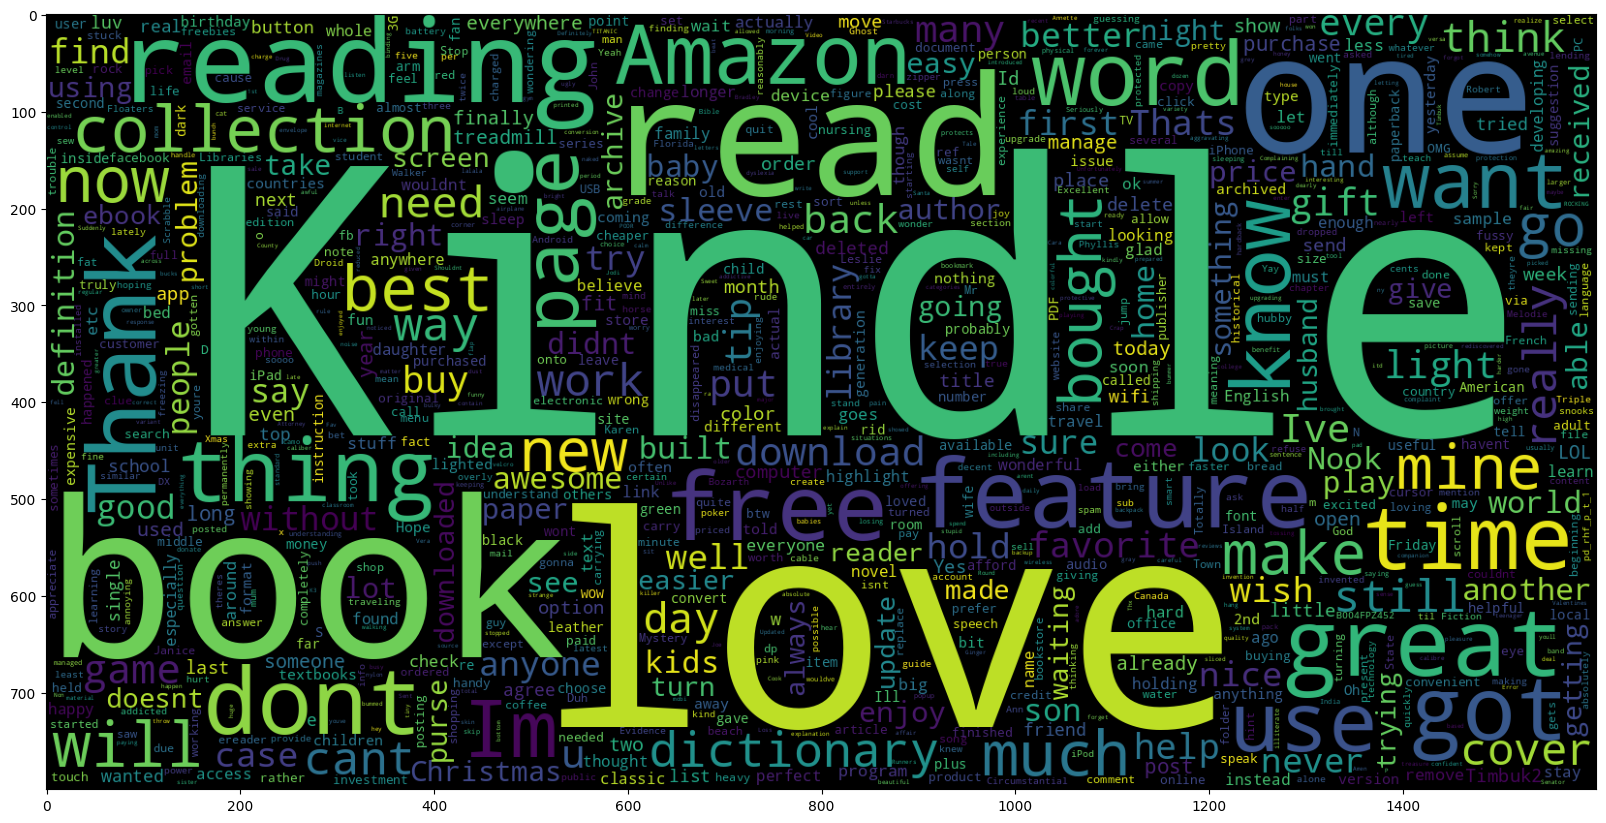

In [25]:
data_neg = data['FBComments'][:900]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 900 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

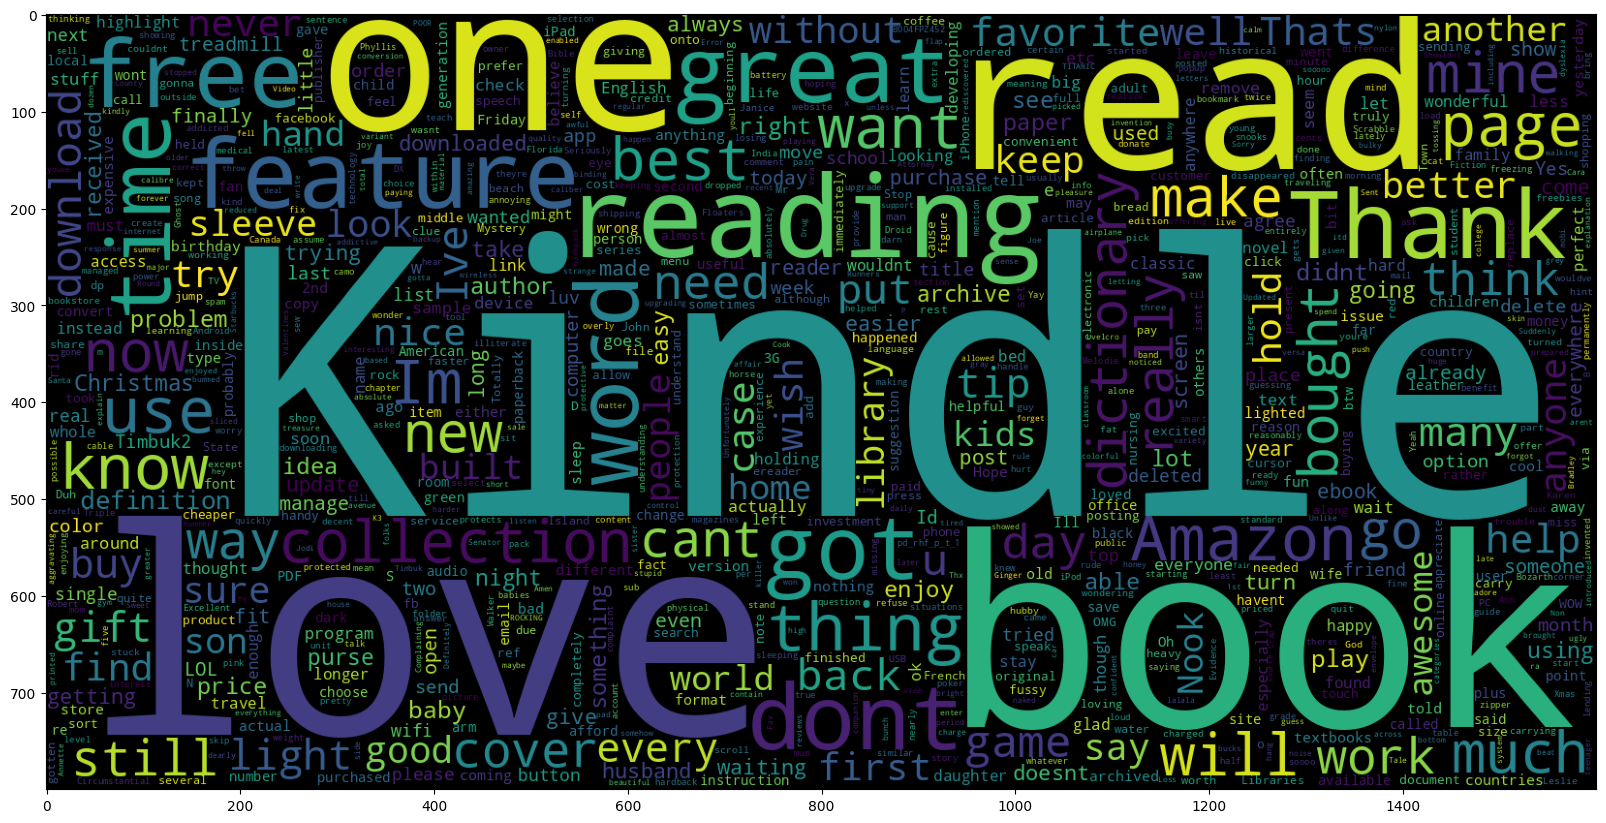

In [26]:
data_neu = data['FBComments'][:900]
plt.figure(figsize = (20,20))
wc1 = WordCloud(max_words = 900 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc1)

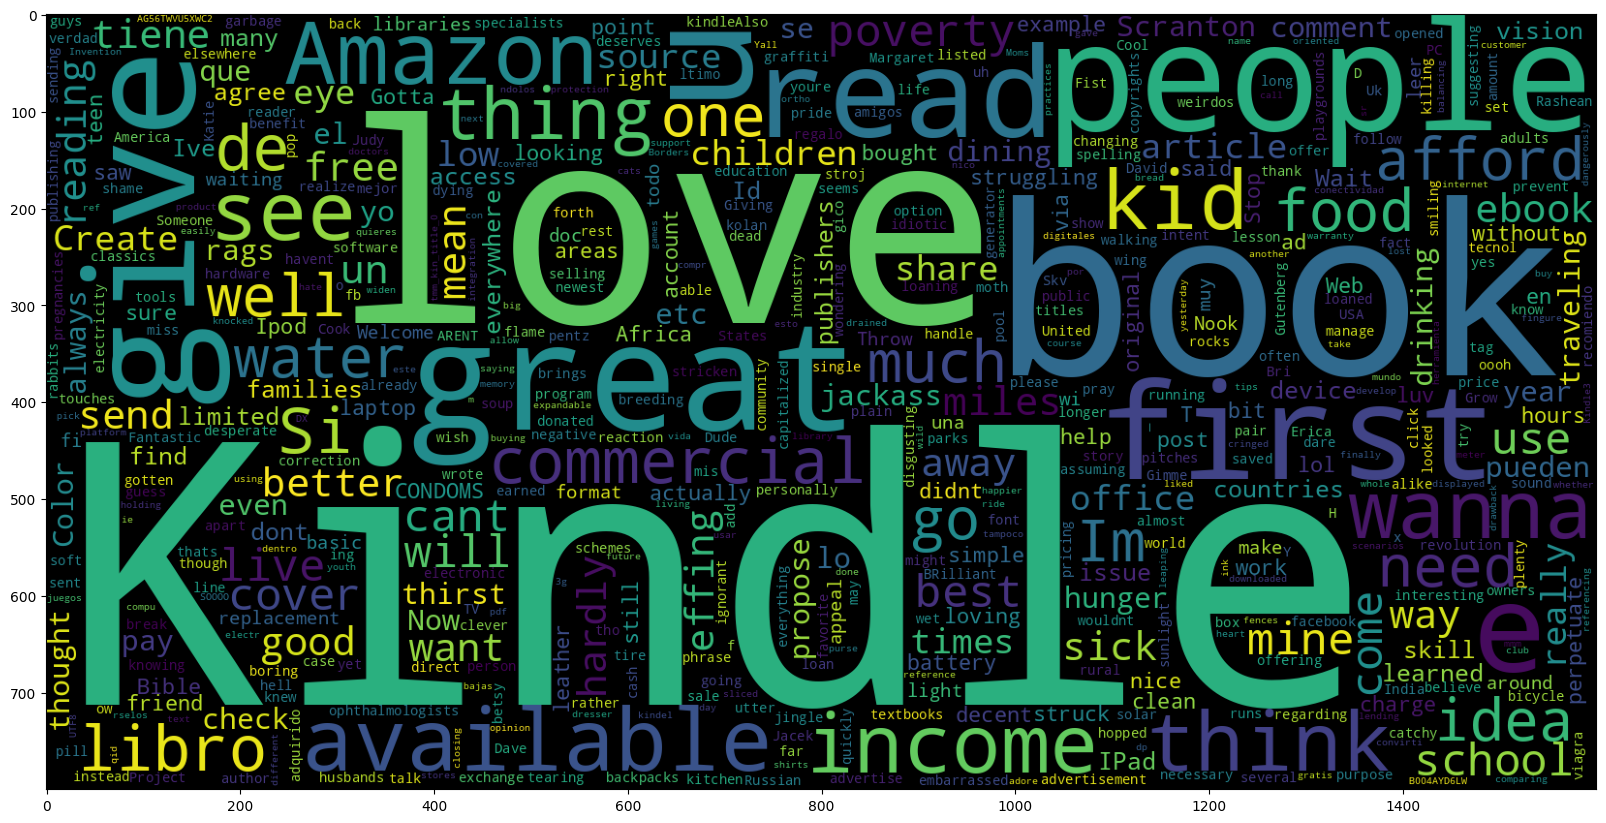

In [27]:
data_pos = data['FBComments'][900:]
wc2 = WordCloud(max_words = 900 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc2)

In [28]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =1)

In [29]:
vectoriser = TfidfVectorizer(ngram_range=(1,1), max_features=1000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  1000


In [30]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [31]:
def model_Evaluate(model):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Neutral','Positive']
  #group_names = ['True Neg','False Pos','True Neu', 'True Neg','True Pos','False Neu']
  #group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  #labels = [f'{v1}n{v2}n{v3}' for v1, v2,v3 in zip(group_names,group_percentages)]
  #labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = True, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

          -1       1.00      0.11      0.20        18
           0       0.58      0.68      0.62        50
           1       0.85      0.89      0.87       132

    accuracy                           0.77       200
   macro avg       0.81      0.56      0.56       200
weighted avg       0.79      0.77      0.75       200



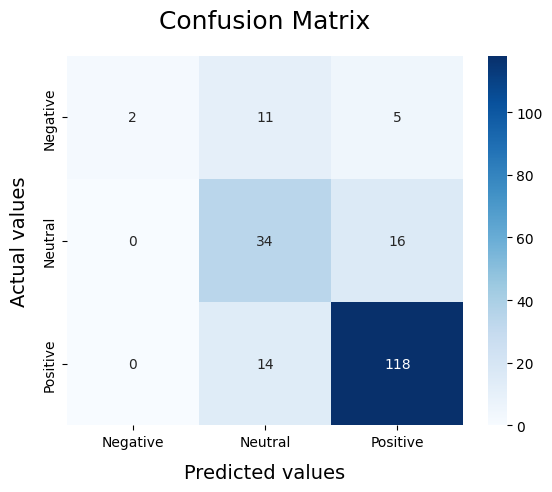

In [32]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred1 = SVCmodel.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
SVCacc=accuracy_score(y_pred1, y_test)
print("Test accuracy: {:.2f}%".format(SVCacc*100))

Test accuracy: 77.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        18
           0       0.60      0.58      0.59        50
           1       0.80      0.92      0.85       132

    accuracy                           0.75       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.68      0.75      0.71       200



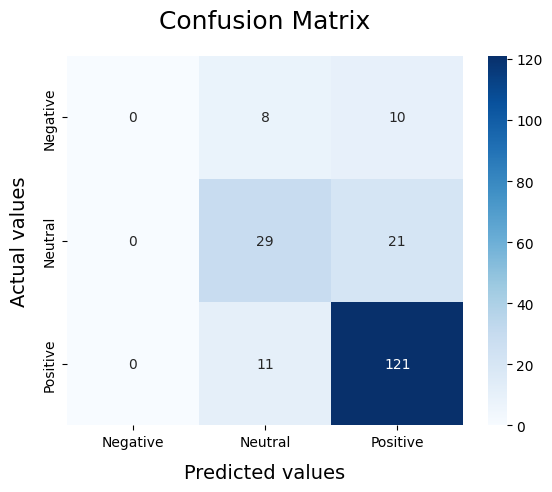

In [34]:
LRmodel = LogisticRegression(C = 2, max_iter = 500, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred2 = LRmodel.predict(X_test)

In [35]:
LRacc=accuracy_score(y_pred2, y_test)
print("Test accuracy: {:.2f}%".format(LRacc*100))

Test accuracy: 75.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        18
           0       0.58      0.76      0.66        50
           1       0.85      0.86      0.86       132

    accuracy                           0.76       200
   macro avg       0.48      0.54      0.50       200
weighted avg       0.71      0.76      0.73       200



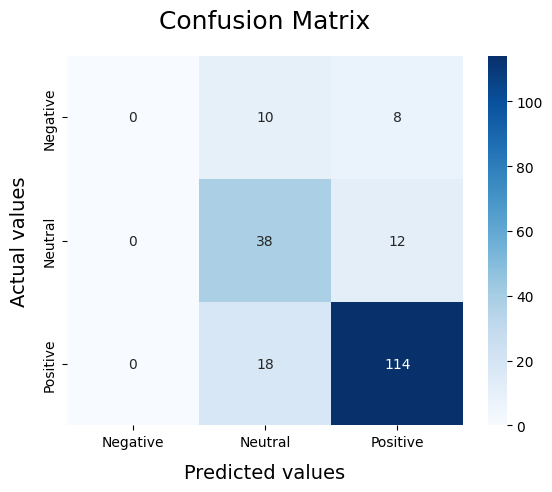

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, y_train)
model_Evaluate(classifier)
y_pred3 = classifier.predict(X_test)

In [46]:
RanFacc=accuracy_score(y_pred3, y_test)
print("Test accuracy: {:.2f}%".format(RanFacc*100))

Test accuracy: 76.00%
